In [45]:
from Bio.PDB import PDBList
from pdbfixer import PDBFixer
from simtk.openmm.app import PDBFile

In [35]:
fromFile = '/Users/weilu/Research/server/may_week2_2020/hemoglobin/source/5x2r.pdb'
fixer = PDBFixer(filename=fromFile)

chains = list(fixer.topology.chains())
Chosen_chain = "ABCD"

chains_to_remove = [i for i, x in enumerate(chains) if x.id not in Chosen_chain]

fixer.removeChains(chains_to_remove)

fixer.findMissingResidues()
# add missing residues in the middle of a chain, not ones at the start or end of the chain.
chains = list(fixer.topology.chains())
keys = fixer.missingResidues.keys()
if True:
    print("chains to remove", chains_to_remove)
    print("missing residues: ", keys)
if not True:
    for key in list(keys):
        del fixer.missingResidues[key]
else:
    if True:
        for key in list(keys):
            chain_tmp = chains[key[0]]
            if key[1] == 0 or key[1] == len(list(chain_tmp.residues())):
                del fixer.missingResidues[key]

fixer.findNonstandardResidues()
fixer.replaceNonstandardResidues()
# fixer.removeHeterogens(keepWater=False)
fixer.findMissingAtoms()
try:
    fixer.addMissingAtoms()
except:
    print("Unable to add missing atoms")

fixer.addMissingHydrogens(7.0)
PDBFile.writeFile(fixer.topology, fixer.positions, open('/Users/weilu/Research/server/may_week2_2020/hemoglobin/setups/four_chains/test.pdb', 'w'), keepIds=False)



chains to remove [4, 5, 6, 7, 8, 9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23]
missing residues:  dict_keys([(0, 0), (1, 0), (2, 0), (3, 0)])


In [33]:
a = list(fixer.topology.chains())

In [27]:
b = a[-1]

In [29]:
list(b.residues())

[<Residue 573 (HNI) of chain 7>]

In [43]:
removeHeterogens = False if keep is True else True

In [44]:
removeHeterogens

True

In [41]:
keep = True

In [42]:
keep = False

In [54]:
import sys
sys.path.insert(0,'/Users/weilu/opt/')
from small_script.myFunctions import *
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [58]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [51]:
fastaFile = "/Users/weilu/Research/server/may_week2_2020/disulfide_bond/setups/1ppb_H/1ppb_H.fasta"
seq = getSeqFromFasta(fastaFile)
n =len(seq)

In [55]:
fileName = f"/Users/weilu/Research/server/may_week2_2020/disulfide_bond/setups/1ppb_H/1ppb_H.pdb"
crystal = getContactMapFromPDB(fileName, n)
n = crystal.shape[0]
dmp, _ = get_contactFromDMP(f"/Users/weilu/Research/server/may_week2_2020/disulfide_bond/DMP/1ppb_H/1ppb_H.deepmetapsicov.con", n)



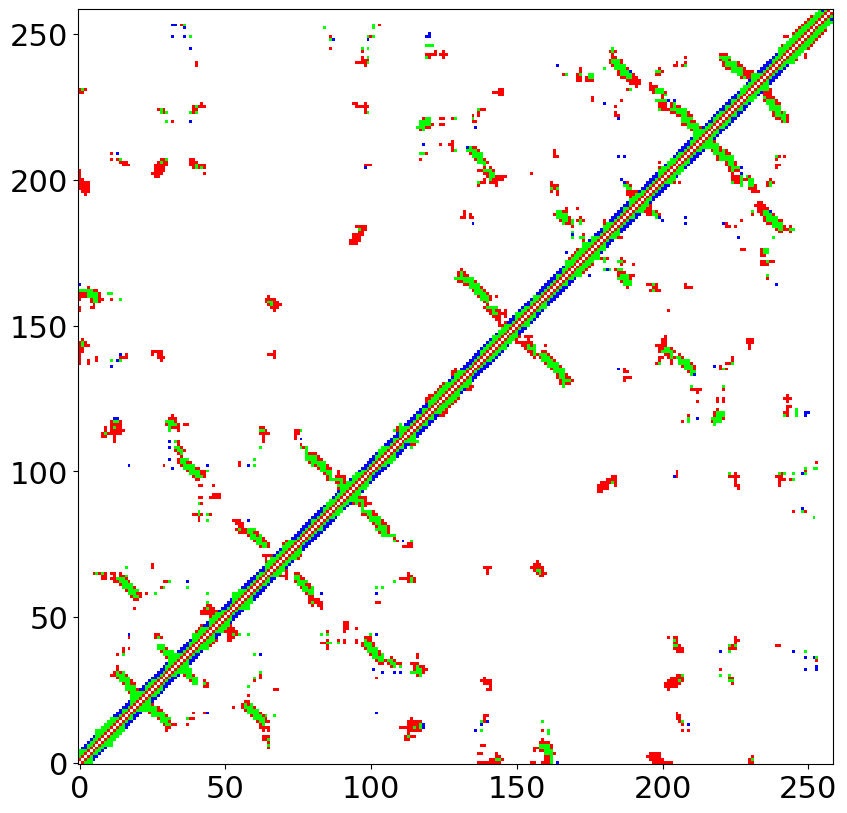

In [61]:
combined = (crystal>0.5).astype(int) + 2*(dmp>0.5).astype(int)
from matplotlib import colors
cmap = colors.ListedColormap(['white', 'red', 'blue', 'lime'])
bounds=[-1,0.01, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)

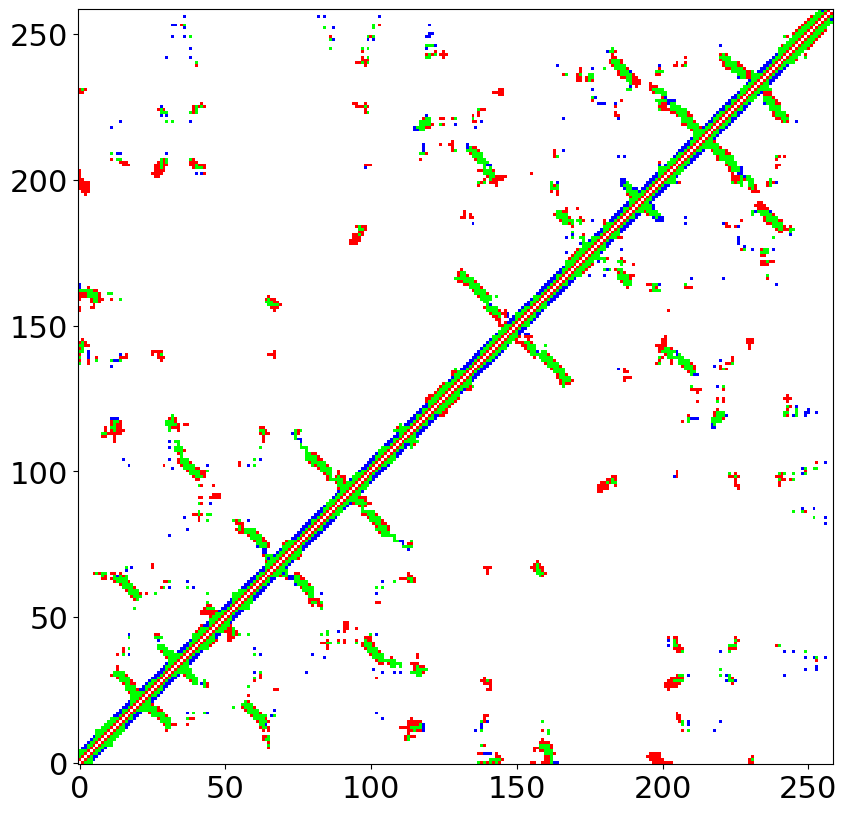

In [60]:
combined = (crystal>0.5).astype(int) + 2*(dmp>0.3).astype(int)
from matplotlib import colors
cmap = colors.ListedColormap(['white', 'red', 'blue', 'lime'])
bounds=[-1,0.01, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)

In [ ]:
plt.savefig(f"figures/contact_{i}_cutoff_{DMP_cutoff}.png", dpi=300)

In [63]:
data = pd.read_csv("/Users/weilu/Dropbox/openAWSEM/data/complete_run_without_er_gamma_yesCysCys_12-02.csv", index_col=0)
a = pd.read_csv("/Users/weilu/Dropbox/openAWSEM/data/length_info_12-01.csv", index_col=0)
data = data.merge(a, on="Protein")

/Users/weilu/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
plt.rcParams['figure.figsize'] = 1*np.array([16.18033, 10])    #golden ratio
memory = 'ho'
filtered_data = data.query(f"memory == '{memory}'").query("k_cys != 'k_10' and k_cys != 'k_20' and k_cys != 'k_1'")
# filtered_data = data.query(f"Protein == '{protein}'").query(f"memory == '{memory}'").query("k_cys != 'k_10' and k_cys != 'k_20'")
Q_max = filtered_data.sort_values('Q').groupby(["k_cys", "Protein"]).tail(1).sort_values(['k_cys', "Q"])
Q_max.Protein = pd.Categorical(Q_max.Protein, a.sort_values("Length").Protein.values)
Q_max.k_cys = pd.Categorical(Q_max.k_cys,  ["original", "k_0", "k_1", "k_2", "k_5"], ordered=True)
# Q_max["Annealing Index"] = Q_max.groupby(["Submode"])["Q"].rank(method="first", ascending=False).astype(int)
# last = data.query("Steps > 350 and Folder in ['eighth_2_cys']")
Q_max["Scheme"] = Q_max["k_cys"]
# sns.lineplot("Annealing Index", "Q", markers=True, style="k_cys", data=Q_max, hue="k_cys", dashes=False)
ax = sns.lineplot("Protein", "Q", hue="Scheme", markers=True, data=Q_max.sort_values("k_cys").reset_index(drop=True), style="Scheme", dashes=False)
plt.ylabel("Best Q")
# _ = plt.xticks(np.arange(1, 21, 1))
# plt.title(f"structure prediction results of 5 Disufide rich proteins")
# plt.savefig(f"{figureFolder}/fig3_k_cys_complete.png", dpi=300)